**Rules for the code:**

- Include all the code you used for your report in this file. The code for any section in the report should go under the same section in this file.
- Any missing code will result in -20% from its corresponding section in the report.
- Any irrelevant code will result in -20% from its corresponding section in the report.
- Make sure that you run your code before rendering, so all the necessary visual/numeric outputs are visible.
- Any code that is not properly run or throws errors will be considered missing/irrelevant.

## 3) Data

## 5) Data Cleaning 

### a) Cleaning 1
*By \<Name of team member>*

### b) Cleaning 2
*By \<Qiwen>*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


data = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [2]:
data.isnull().sum() # Teacher_Quality, Parental_Education_Level , Distance_from_Home  

data['Extracurricular_Activities'].unique() # Check if there are only two unique variables (Yes, no)

data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0}) # Convert to numeric variable; 
                                                                                                        #replace 'Yes' with 1 and 'No' with 0.


In [3]:
data['Exam_Score'].unique() # check if there are incorrect values/unreasonable values 
data['Previous_Scores'].unique() # check if there are incorrect values/unreasonable values 

array([ 73,  59,  91,  98,  65,  89,  68,  50,  80,  71,  88,  87,  97,
        72,  74,  70,  82,  58,  99,  84, 100,  75,  54,  90,  94,  51,
        57,  66,  96,  93,  56,  52,  63,  79,  81,  69,  95,  60,  92,
        77,  62,  85,  78,  64,  76,  55,  86,  61,  53,  83,  67])

### c) Cleaning 3
*By \<Name of team member>*

### d) Cleaning 4
*By \<Name of team member>*

## 6) Data Analysis

### a) Analysis 1
*By \<Name of team member>*

### b) Analysis 2
*By \<Qiwen>*

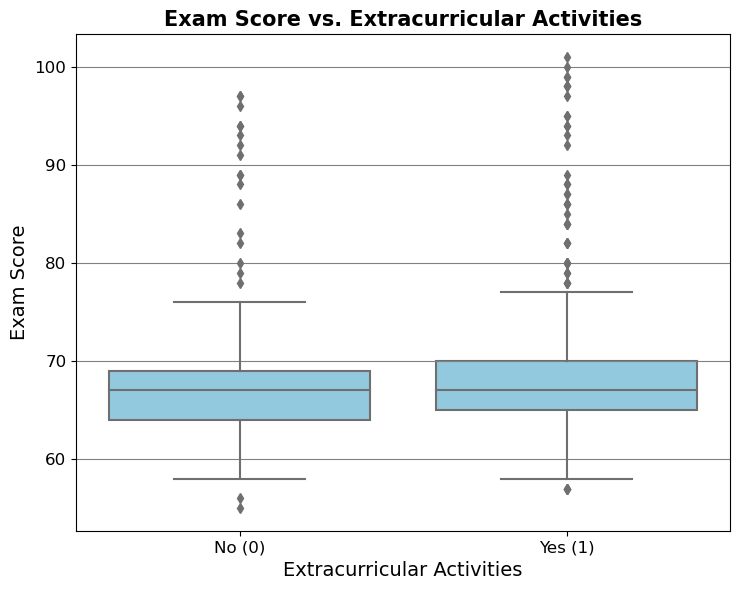

                             count       mean       std   min   25%   50%  \
Extracurricular_Activities                                                  
0                           2669.0  66.931435  3.792127  55.0  64.0  67.0   
1                           3938.0  67.441849  3.942860  57.0  65.0  67.0   

                             75%    max  
Extracurricular_Activities               
0                           69.0   97.0  
1                           70.0  101.0  


In [4]:
plt.figure(figsize=(7.5, 6))

sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=data, color = 'skyblue') # Create a boxplot with 'Extracurricular_Activities'
                                                                                                            # and 'Exam_Score'

plt.title('Exam Score vs. Extracurricular Activities', fontsize=15, fontweight='bold')
plt.xlabel('Extracurricular Activities', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Yes (1)'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', color='gray')
plt.tight_layout()
plt.show()

grouped = data.groupby('Extracurricular_Activities')['Exam_Score'].describe()  # Group 'Exam_Score' with 'Extracurricular_Activities'
print(grouped)                                                                                       # and look for Stats



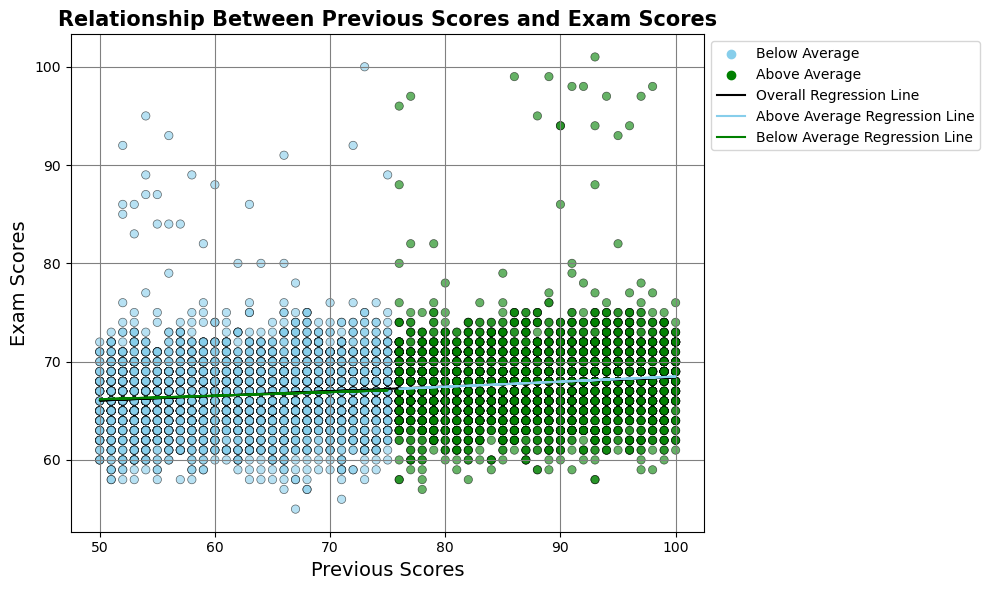

In [5]:
# Create an columns to separate 'Previous_Scores' to above average and below average
data['Previous_Scores_Scale'] = data['Previous_Scores'] > data['Previous_Scores'].mean()
data['Previous_Scores_Scale'] = data['Previous_Scores_Scale'].map({True: 'Above Average', False: 'Below Average'})
above_avg = data[data['Previous_Scores_Scale'] == 'Above Average']
below_avg = data[data['Previous_Scores_Scale'] == 'Below Average']

# Create a scatterplot with 'Previous_Scores' and 'Exam_Score'
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=data,       
                alpha=0.6, hue='Previous_Scores_Scale',edgecolor='black', palette=['skyblue', 'green'])

# Overall regression line
x = np.array(data['Previous_Scores'])
y = np.array(data['Exam_Score'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='black', label='Overall Regression Line')

# Above-average regression line 
x_above = np.array(above_avg['Previous_Scores'])
y_above = np.array(above_avg['Exam_Score'])
m_above, b_above = np.polyfit(x_above, y_above, 1)

plt.plot(x_above, m_above * x_above + b_above, 
         color='skyblue', label='Above Average Regression Line')


# Below-average regression line 
x_below = np.array(below_avg['Previous_Scores'])
y_below = np.array(below_avg['Exam_Score'])
m_below, b_below = np.polyfit(x_below, y_below, 1)

plt.plot(x_below, m_below * x_below + b_below, 
         color='green', label='Below Average Regression Line')

plt.title('Relationship Between Previous Scores and Exam Scores',fontsize= 15 ,fontweight='bold')
plt.xlabel('Previous Scores', fontsize=14)
plt.ylabel('Exam Scores', fontsize=14)
plt.grid(color='gray')
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

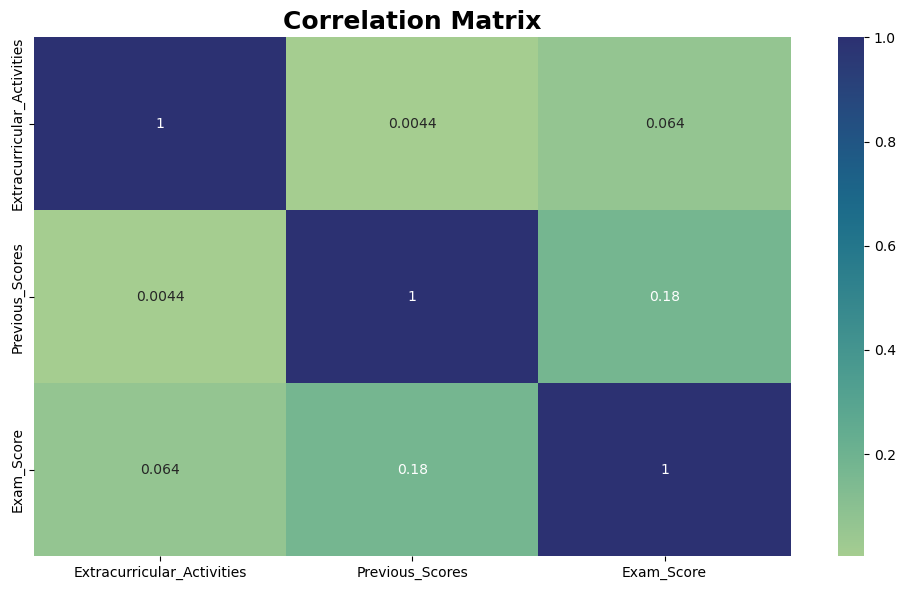

In [6]:
correlation = data[['Extracurricular_Activities', 'Previous_Scores', 'Exam_Score']].corr()

#Create a heatmap with 'Previous_Scores', 'Exam_Score', and 'Extracurricular_Activities'
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation, linecolor='gray', cmap='crest', annot=True)  

plt.title('Correlation Matrix', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.show()

### c) Analysis 3
*By \<Name of team member>*

### d) Analysis 4
*By \<Name of team member>*